In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
import matplotlib.ticker as mtick

### Fitting hypothesis
$$
    Y = A_0 + A_m \frac{X^n}{{K_m}^n + X^n}
$$

In [22]:
# def log_hill_func(x, A0, Am, Km, n):
#     x_log = np.log10(x)
#     Km_log = np.log10(Km)
#     return A0 + (x_log**n / (x_log**n + Km_log**n)) * Am

def hill_func(x, A0, Am, Km, n):
    return A0 + (x**n / (x**n + Km**n)) * Am

def plot_box(xs, y_lists, widths, box_color, xlabel, ylabel):

    fig, ax = plt.subplots(figsize=[4, 2.4])
    fig.dpi = 250
    ax.boxplot(y_lists, sym='.k', whis=(5, 95), positions=xs, widths=widths,
               patch_artist=True, boxprops={'facecolor':box_color, 'edgecolor':'k'}, medianprops={'color':'k'})
    ax.set_xscale('symlog', linthresh=1, linscale=0.5)
    ax.set_ylim([0, 1])
    ax.set_xlim([-0.2, 1000])
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_xticks(aba_concs, labels=aba_concs, rotation=60)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    
    return fig, ax

In [23]:
aba_concs = np.array([0, 1, 5, 10, 25, 100, 250, 500])
conc_df = pd.read_excel('./2023-02-17_Quantification.xlsx', sheet_name='Summary_Concentration', skiprows=2, header=None)

mRNA_fracs_all = []
for idx in range(1, 9):
    fracs = np.array(conc_df[idx])
    mRNA_fracs_all.append(fracs[~np.isnan(fracs)])
    
dCas13_fracs_all = []
for idx in range(11, 19):
    fracs = np.array(conc_df[idx])
    dCas13_fracs_all.append(fracs[~np.isnan(fracs)])

In [24]:
perc_filter = 0

mRNA_fracs_filtered = []
for fracs in mRNA_fracs_all:
    upper = np.percentile(fracs, perc_filter)
    lower = np.percentile(fracs, 100 - perc_filter)
    mRNA_fracs_filtered.append(np.clip(fracs, upper, lower))
    
dCas13_fracs_filtered = []
for fracs in dCas13_fracs_all:
    upper = np.percentile(fracs, perc_filter)
    lower = np.percentile(fracs, 100 - perc_filter)
    dCas13_fracs_filtered.append(np.clip(fracs, upper, lower))

In [25]:
dCas13_fracs_filtered

[array([0.118, 0.156, 0.129, 0.124, 0.09 , 0.135, 0.288, 0.088, 0.143,
        0.12 , 0.093, 0.245, 0.145, 0.131, 0.149, 0.195, 0.283, 0.26 ,
        0.122, 0.154, 0.239, 0.248, 0.204, 0.2  , 0.136, 0.119, 0.124,
        0.152, 0.114]),
 array([0.385, 0.101, 0.128, 0.215, 0.097, 0.105, 0.115, 0.181, 0.194,
        0.166, 0.302, 0.151, 0.271, 0.178, 0.188, 0.238, 0.316, 0.153,
        0.298, 0.07 , 0.158, 0.338, 0.141, 0.189, 0.266, 0.118, 0.149,
        0.139, 0.084, 0.141, 0.06 ]),
 array([0.331, 0.248, 0.32 , 0.301, 0.37 , 0.215, 0.259, 0.13 , 0.221,
        0.159, 0.362, 0.204, 0.197, 0.393, 0.358, 0.326, 0.31 , 0.317,
        0.499, 0.285, 0.454, 0.213, 0.227, 0.26 , 0.45 , 0.379, 0.14 ,
        0.155, 0.216, 0.497, 0.324, 0.342, 0.188]),
 array([0.415, 0.597, 0.323, 0.39 , 0.4  , 0.308, 0.494, 0.504, 0.308,
        0.281, 0.421, 0.341, 0.291, 0.159, 0.635, 0.369, 0.422, 0.421,
        0.433, 0.361, 0.513, 0.211, 0.299, 0.602, 0.469, 0.302, 0.406,
        0.171, 0.345, 0.462, 0.248

In [26]:
mRNA_fracs_filtered

[array([0.045, 0.086, 0.048, 0.044, 0.089, 0.053, 0.366, 0.055, 0.085,
        0.05 , 0.058, 0.08 , 0.174, 0.073, 0.048, 0.151, 0.168, 0.154,
        0.073, 0.12 , 0.287, 0.249, 0.195, 0.222, 0.037, 0.058, 0.07 ,
        0.082, 0.095]),
 array([0.231, 0.031, 0.053, 0.124, 0.015, 0.032, 0.048, 0.067, 0.09 ,
        0.054, 0.302, 0.093, 0.115, 0.085, 0.03 , 0.092, 0.147, 0.049,
        0.179, 0.038, 0.139, 0.277, 0.093, 0.152, 0.468, 0.083, 0.121,
        0.152, 0.039, 0.113, 0.043]),
 array([0.547, 0.112, 0.097, 0.264, 0.107, 0.205, 0.164, 0.095, 0.156,
        0.125, 0.24 , 0.153, 0.143, 0.238, 0.641, 0.293, 0.277, 0.331,
        0.512, 0.076, 0.466, 0.215, 0.131, 0.107, 0.29 , 0.236, 0.052,
        0.2  , 0.109, 0.264, 0.099, 0.285, 0.134]),
 array([0.188, 0.595, 0.105, 0.341, 0.325, 0.225, 0.554, 0.3  , 0.155,
        0.188, 0.495, 0.492, 0.053, 0.162, 0.067, 0.279, 0.479, 0.536,
        0.199, 0.486, 0.629, 0.217, 0.309, 0.387, 0.129, 0.134, 0.567,
        0.104, 0.118, 0.506, 0.147

In [27]:
all_x_1 = [[aba_concs[idx]] * len(mRNA_fracs_filtered[idx]) for idx in range(1,8)]
all_x_1 = np.hstack(all_x_1)
all_y_1 = np.hstack(mRNA_fracs_filtered[1:])
A0_est_1 = mRNA_fracs_filtered[0].mean()

popt_1, popv_1 = curve_fit(lambda x, Am, Km, n: hill_func(x, A0_est_1, Am, Km, n), 
                       all_x_1, all_y_1,
                       bounds=([0, 0.0001, 0], [1 - A0_est_1, np.inf, np.inf]))
print('[Am, Km, n] = ', end='')
print(popt_1)
print('A0 + Am = {0:.3f}'.format(A0_est_1 + popt_1[0]))

[Am, Km, n] = [ 0.47083968 25.65500863  0.69738122]
A0 + Am = 0.585


In [28]:
np.median(mRNA_fracs_filtered[0])

0.082

Text(0.5, 1.0, 'Fitting data')

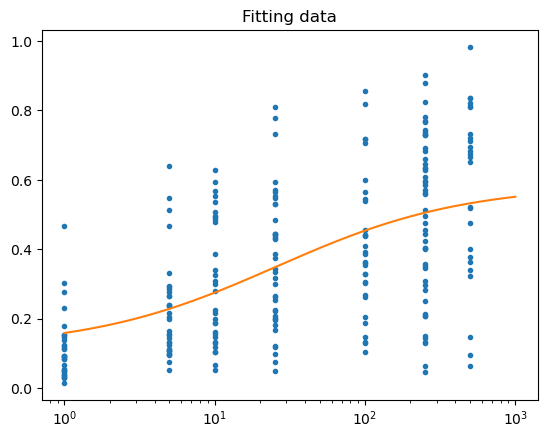

In [29]:
xs = np.logspace(0, 3, 1000)
plt.plot(all_x_1, all_y_1, '.')
plt.plot(xs, hill_func(xs, A0_est_1, *popt_1))
plt.xscale('log')
plt.title('Fitting data')

C:\Users\yitongma\AppData\Local\Temp\ipykernel_9016\2052301372.py:1: RuntimeWarning: divide by zero encountered in log10
  box_widths = 10**(np.log10(aba_concs) + 0.08) - 10**(np.log10(aba_concs) - 0.08)


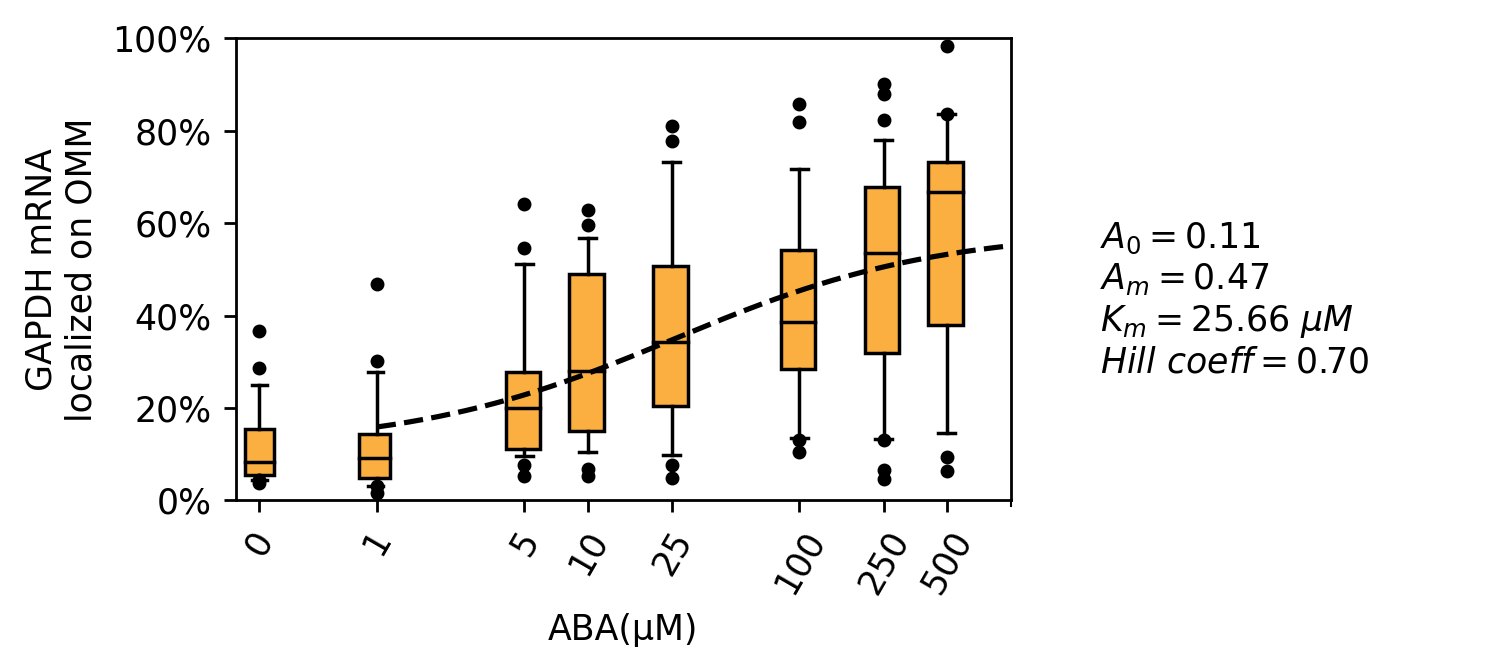

In [34]:
box_widths = 10**(np.log10(aba_concs) + 0.08) - 10**(np.log10(aba_concs) - 0.08)
box_widths[0:2] = [0.25, 0.30]

fig, ax = plot_box(aba_concs, mRNA_fracs_all, box_widths, '#FAAF40', 'ABA(μM)', 'GAPDH mRNA\nlocalized on OMM')

ax.plot(xs, hill_func(xs, A0_est_1, *popt_1), 'k--')
ax.annotate('$A_0={0:.2f}$ \n$A_m={1:.2f}$ \n$K_m={2:.2f}\ μM$ \n$Hill\ coeff={3:.2f}$'.format(A0_est_1, popt_1[0], popt_1[1], popt_1[2]), 
            [1.1, 0.5], xycoords='figure fraction')

fig.savefig('./mRNA_conc.pdf', bbox_inches="tight")

In [35]:
all_x_2 = [[aba_concs[idx]] * len(dCas13_fracs_filtered[idx]) for idx in range(1,8)]
all_x_2 = np.hstack(all_x_2)
all_y_2 = np.hstack(dCas13_fracs_filtered[1:])

A0_est_2 = dCas13_fracs_filtered[0].mean()
popt_2, popv = curve_fit(lambda x, Am, Km, n: hill_func(x, A0_est_2, Am, Km, n), 
                       all_x_2, all_y_2,
                       bounds=([0, 0.000001, 0], [1 - A0_est_2, np.inf, np.inf]))

print('[Am, Km, n] = ', end='')
print(popt_2)
print('A0 + Am = {0:.3f}'.format(A0_est_2 + popt_2[0]))

[Am, Km, n] = [0.42373759 9.88772453 1.1523442 ]
A0 + Am = 0.586


Text(0.5, 1.0, 'Fitting data')

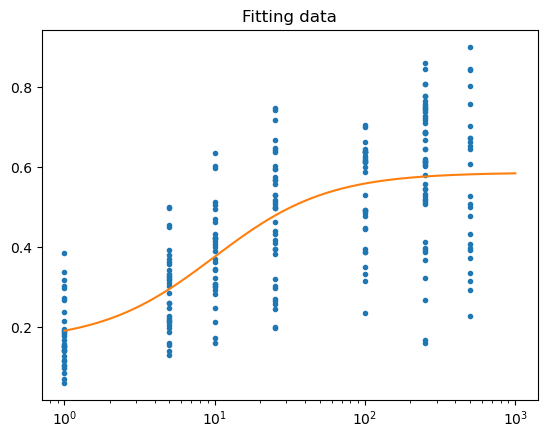

In [36]:
plt.plot(all_x_2, all_y_2, '.')
plt.plot(xs, hill_func(xs, A0_est_2, *popt_2))
plt.xscale('log')
plt.title('Fitting data')

C:\Users\yitongma\AppData\Local\Temp\ipykernel_9016\1626407337.py:1: RuntimeWarning: divide by zero encountered in log10
  box_widths = 10**(np.log10(aba_concs) + 0.08) - 10**(np.log10(aba_concs) - 0.08)


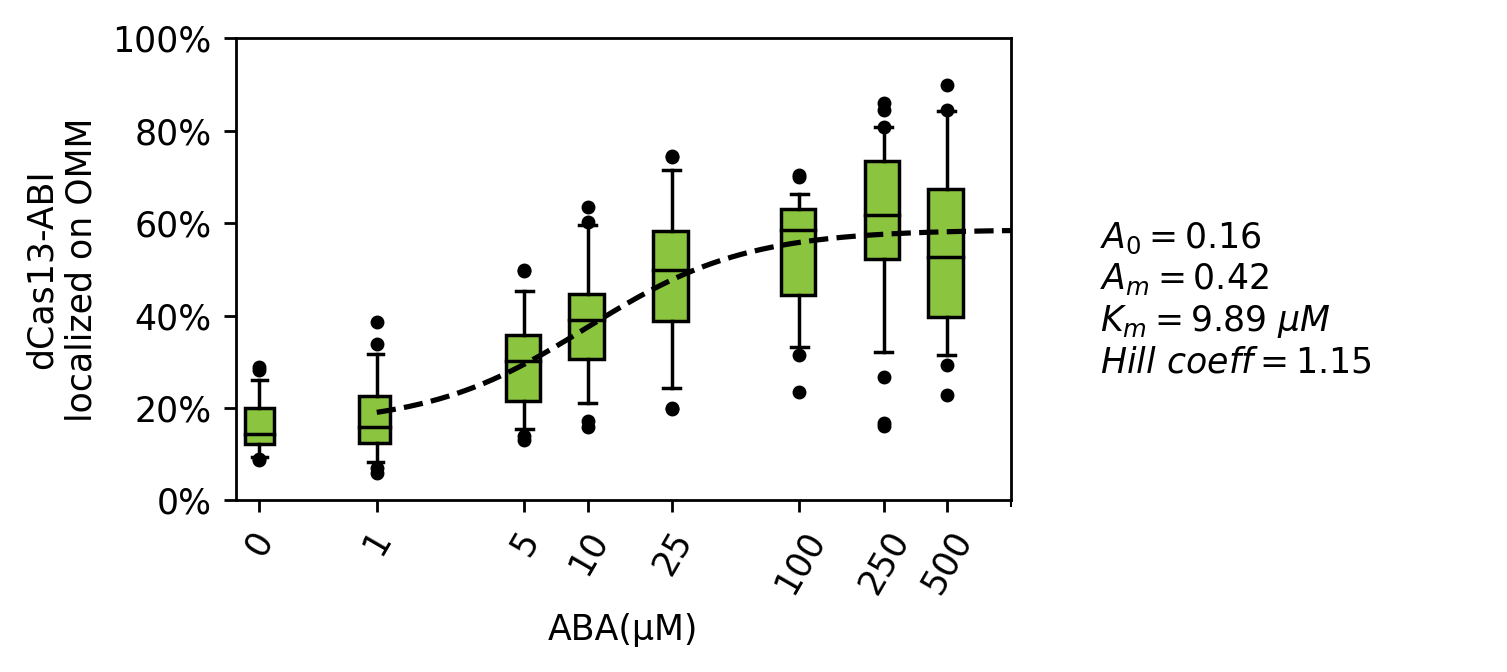

In [38]:
box_widths = 10**(np.log10(aba_concs) + 0.08) - 10**(np.log10(aba_concs) - 0.08)
box_widths[0:2] = [0.25, 0.3]

fig, ax = plot_box(aba_concs, dCas13_fracs_all, box_widths, '#8BC53F', 'ABA(μM)', 'dCas13-ABI\nlocalized on OMM')

ax.plot(xs, hill_func(xs, A0_est_2, *popt_2), 'k--')
ax.annotate('$A_0={0:.2f}$ \n$A_m={1:.2f}$ \n$K_m={2:.2f}\ μM$ \n$Hill\ coeff={3:.2f}$'.format(A0_est_2, popt_2[0], popt_2[1], popt_2[2]), 
            [1.1, 0.5], xycoords='figure fraction')

fig.savefig('./dCas13_conc.pdf', bbox_inches="tight")